In [6]:
import pandas as pd


In [7]:
df = pd.read_csv('Admission_Predict.csv')

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
    df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df.shape

(400, 9)

In [11]:
df.columns = df.columns.str.strip()

In [12]:
from sklearn.preprocessing import Binarizer

In [13]:
bi = Binarizer(threshold=0.75)

In [14]:
df['Chance of Admit']=bi.fit_transform(df[['Chance of Admit']])

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [18]:
x=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
y_train

250    0.0
63     0.0
312    1.0
159    0.0
283    1.0
      ... 
323    0.0
192    1.0
117    0.0
47     1.0
172    1.0
Name: Chance of Admit, Length: 300, dtype: float64

In [3]:
# import class

from sklearn.tree import DecisionTreeClassifier

In [4]:
DTC = DecisionTreeClassifier()

In [23]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=DTC.predict(x_test)

In [26]:
y_pred

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.])

250    0.0
63     0.0
312    1.0
159    0.0
283    1.0
      ... 
323    0.0
192    1.0
117    0.0
47     1.0
172    1.0
Name: Chance of Admit, Length: 300, dtype: float64

In [29]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [30]:
result

,actual,predicted
132,0.0,0.0
309,0.0,0.0
341,1.0,1.0
196,0.0,0.0
246,0.0,0.0
...,...,...
146,0.0,0.0
135,1.0,1.0
390,0.0,0.0
264,0.0,0.0


In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [32]:
from sklearn.metrics import classification_report

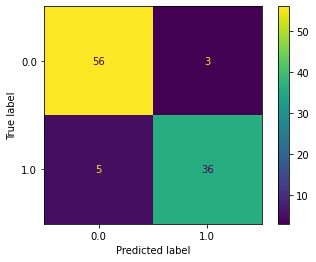

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [35]:
accuracy_score(y_test,y_pred)

0.92

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93        59
         1.0       0.92      0.88      0.90        41

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



In [38]:
new = [[136,314,109,4,3.5,4.0,8.77,1]]   #prediction

In [41]:
DTC.predict(new)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

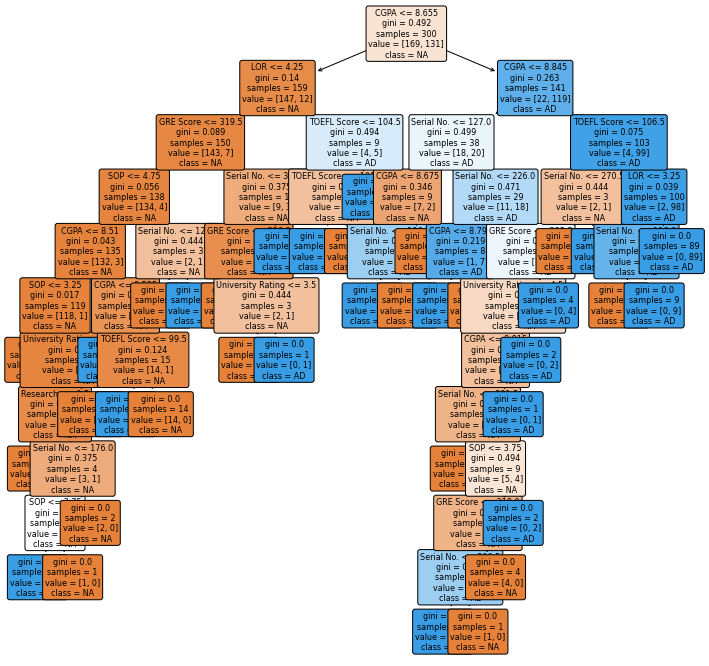

In [47]:
plt.figure(figsize = (12,12))
plot_tree(DTC,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','AD'] );
